In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("usernam3/shopify-app-store")

print("Path to dataset files:", path)

100%|██████████| 123M/123M [00:06<00:00, 21.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/usernam3/shopify-app-store/versions/5


In [89]:
import pandas as pd
import os
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
for file in os.listdir(path):
    print(file)

categories.csv
pricing_plans.csv
apps.csv
key_benefits.csv
reviews.csv
apps_categories.csv
pricing_plan_features.csv


In [90]:
csv_path = os.path.join(path, 'apps.csv')
df = pd.read_csv(csv_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11951 entries, 0 to 11950
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11951 non-null  object 
 1   url              11951 non-null  object 
 2   title            11951 non-null  object 
 3   developer        11951 non-null  object 
 4   developer_link   11951 non-null  object 
 5   icon             11951 non-null  object 
 6   rating           11951 non-null  float64
 7   reviews_count    11951 non-null  int64  
 8   description_raw  11951 non-null  object 
 9   description      11951 non-null  object 
 10  tagline          0 non-null      float64
 11  pricing_hint     11951 non-null  object 
 12  lastmod          11951 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [91]:
df.head(10)

,id,url,title,developer,developer_link,icon,rating,reviews_count,description_raw,description,tagline,pricing_hint,lastmod
0,ee6734e5-88af-4d0f-a128-1671fed6b45c,https://apps.shopify.com/fixbuchhaltung-wiso-m...,WISO MeinBüro,Buhl Data Service GmbH,https://apps.shopify.com/partners/deltra-busin...,https://cdn.shopify.com/app-store/listing_imag...,5.0,2,"<div id=""app-details"" class=""tw-flex tw-flex-c...",Erledigen Sie die Rechnungsstellung und vorber...,NaN,Free to install. Additional charges may apply.,2023-08-25
1,1545c82c-ac96-4120-b214-10064238bfd8,https://apps.shopify.com/modern-product-descri...,Iconic: Product Features,CartBoosters,https://apps.shopify.com/partners/buzz-apps,https://cdn.shopify.com/app-store/listing_imag...,4.7,70,"<div id=""app-details"" class=""tw-flex tw-flex-c...","Show off the key points, benefits, Badges & Pr...",NaN,$5.90/month. Free trial available.,2024-04-12
2,da77ad25-e377-4497-bfec-e8bef3dc59b6,https://apps.shopify.com/checkbox-rro,Checkbox RRO,Web-Systems Solutions,https://apps.shopify.com/partners/web-systems-...,https://cdn.shopify.com/app-store/listing_imag...,5.0,1,"<div id=""app-details"" class=""tw-flex tw-flex-c...",Checkbox RRO is the fiscal solution of electro...,NaN,Free plan available,2024-08-29
3,007c0e10-12ed-4dde-a7a7-79f4b2b155f4,https://apps.shopify.com/my-store-credit,CreditsYard — Store Credit,MerchantYard,https://apps.shopify.com/partners/merchantyard,https://cdn.shopify.com/app-store/listing_imag...,4.4,22,"<div id=""app-details"" class=""tw-flex tw-flex-c...","Store Credit & Cashback Solution, Used To Proc...",NaN,From $29/month. Free trial available.,2024-10-22
4,ef0b825b-76b4-4403-9823-7b48afac654e,https://apps.shopify.com/product-options-by-bss,"BSS Product Options, Variant",Tech Essence (by BSS Commerce),https://apps.shopify.com/partners/tech-essence...,https://cdn.shopify.com/app-store/listing_imag...,5.0,641,"<div id=""app-details"" class=""tw-flex tw-flex-c...","Offer unlimited product options, product varia...",NaN,Price: Free,2024-11-21
5,c86a1c57-d708-437d-b21b-250bac1971f3,https://apps.shopify.com/jeluxpox,Jeluxpox,Jeluxpox,https://apps.shopify.com/partners/jeluxpox,https://cdn.shopify.com/app-store/listing_imag...,5.0,1,"<div id=""app-details"" class=""tw-flex tw-flex-c...","Gain Love, Earn more\nExcellent products and s...",NaN,Free to install. Additional charges may apply.,2023-12-06
6,5ebc36fe-934b-4875-bcad-fb11185361e9,https://apps.shopify.com/countdown-booster-1,Boost Shop: Countdown Timer,boostshoplimited,https://apps.shopify.com/partners/boostshoplim...,https://cdn.shopify.com/app-store/listing_imag...,5.0,11,"<div id=""app-details"" class=""tw-flex tw-flex-c...",Drive sales with Countdown Booster - the ultim...,NaN,Free plan available. Free trial available.,2024-01-28
7,a8f843b7-3228-4dd5-a2bc-d14cd5e74e02,https://apps.shopify.com/zeniva,Zeniva AI,Exarta,https://apps.shopify.com/partners/exarta,https://cdn.shopify.com/app-store/listing_imag...,5.0,4,"<div id=""app-details"" class=""tw-flex tw-flex-c...",Zeniva AI: A Smart Companion For Your Website\...,NaN,Free plan available,2024-10-30
8,868c6da2-4454-4f0c-999f-d4d8ac126881,https://apps.shopify.com/kakao-login,Punch Kakao Social Login,Punch Digital,https://apps.shopify.com/partners/punch-digita...,https://cdn.shopify.com/app-store/listing_imag...,5.0,3,"<div id=""app-details"" class=""tw-flex tw-flex-c...",Let shoppers login to your store with Korean m...,NaN,$1/month. Free trial available.,2023-11-26
9,c58ae550-67c0-405e-8c72-c5c52c190c99,https://apps.shopify.com/token-of-trust-id-ver...,Token of Trust Verification,"Token of Trust, Inc",https://apps.shopify.com/partners/token-of-tru...,https://cdn.shopify.com/app-store/listing_imag...,5.0,4,"<div id=""app-details"" class=""tw-flex tw-flex-c...",Easily verify the age of your customers. With ...,NaN,From $25/month. Free trial available.,2023-10-26


In [92]:
df.drop(columns=['id','url','developer_link','icon','description_raw','description', 'pricing_hint', 'tagline'], inplace=True)
df.head(10)

,title,developer,rating,reviews_count,lastmod
0,WISO MeinBüro,Buhl Data Service GmbH,5.0,2,2023-08-25
1,Iconic: Product Features,CartBoosters,4.7,70,2024-04-12
2,Checkbox RRO,Web-Systems Solutions,5.0,1,2024-08-29
3,CreditsYard — Store Credit,MerchantYard,4.4,22,2024-10-22
4,"BSS Product Options, Variant",Tech Essence (by BSS Commerce),5.0,641,2024-11-21
5,Jeluxpox,Jeluxpox,5.0,1,2023-12-06
6,Boost Shop: Countdown Timer,boostshoplimited,5.0,11,2024-01-28
7,Zeniva AI,Exarta,5.0,4,2024-10-30
8,Punch Kakao Social Login,Punch Digital,5.0,3,2023-11-26
9,Token of Trust Verification,"Token of Trust, Inc",5.0,4,2023-10-26


In [93]:
df

,title,developer,rating,reviews_count,lastmod
0,WISO MeinBüro,Buhl Data Service GmbH,5.0,2,2023-08-25
1,Iconic: Product Features,CartBoosters,4.7,70,2024-04-12
2,Checkbox RRO,Web-Systems Solutions,5.0,1,2024-08-29
3,CreditsYard — Store Credit,MerchantYard,4.4,22,2024-10-22
4,"BSS Product Options, Variant",Tech Essence (by BSS Commerce),5.0,641,2024-11-21
...,...,...,...,...,...
11946,Pickware,Pickware GmbH,4.8,10,2024-07-23
11947,Australia Post EZ Label,Bitnext,5.0,260,2024-10-10
11948,Endear CRM and Clienteling,Endear,4.5,21,2024-07-08
11949,SwissID,tpm solutions,0.0,0,2023-09-18


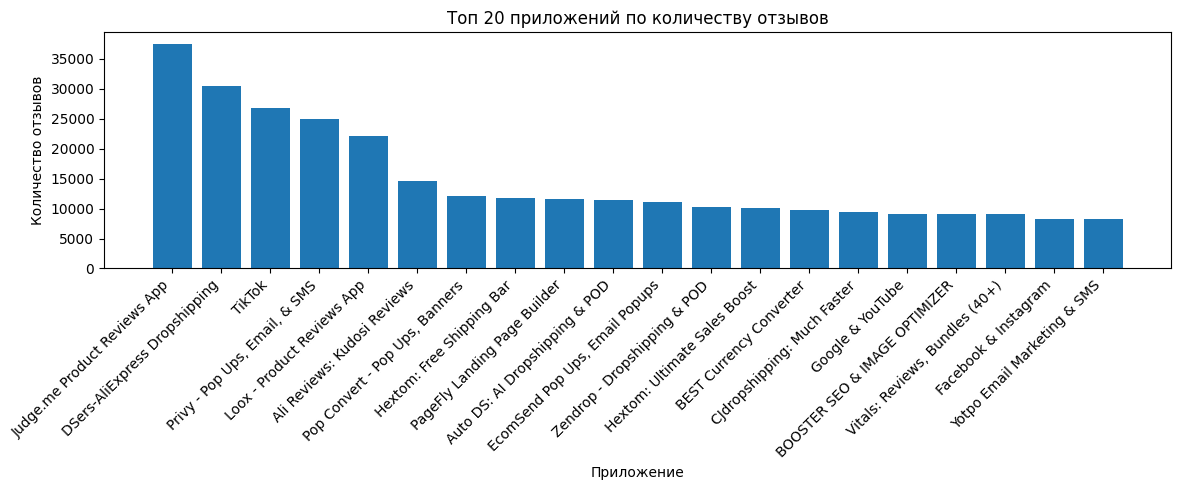

In [100]:
top_20 = df.sort_values(by='reviews_count', ascending=False).head(20)

plt.figure(figsize=(12,5))
plt.bar(top_20['title'], top_20['reviews_count'])
plt.title('Топ 20 приложений по количеству отзывов')
plt.xlabel('Приложение')
plt.ylabel('Количество отзывов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

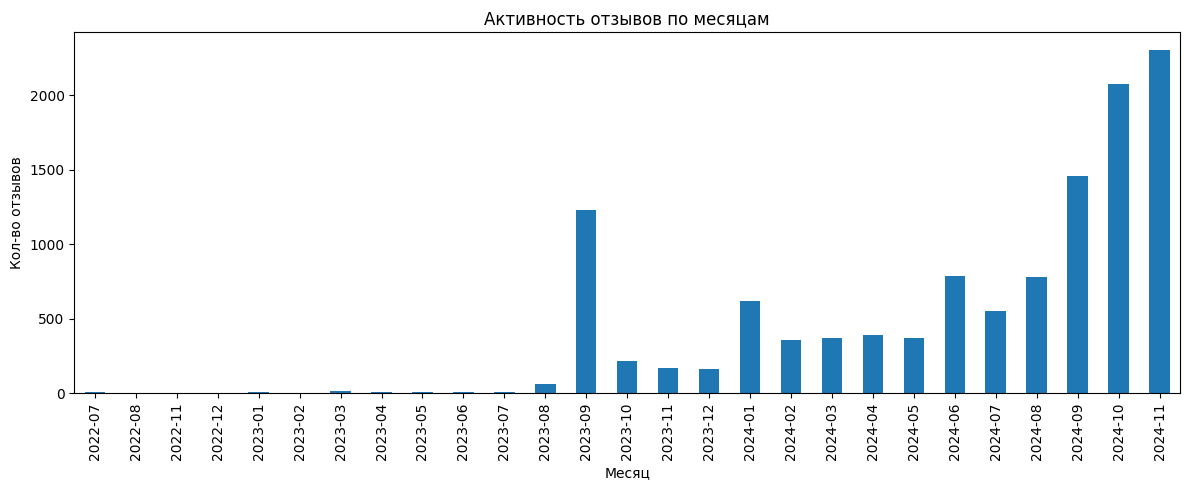

In [97]:
df['lastmod'] = pd.to_datetime(df['lastmod'])
df['lastmod_days'] = (df['lastmod'] - df['lastmod'].min()).dt.days
daily = df.groupby(df['lastmod'].dt.to_period('M')).size()

daily.plot(kind='bar', figsize=(12,5), title='Активность отзывов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Кол-во отзывов')
plt.tight_layout()
plt.show()

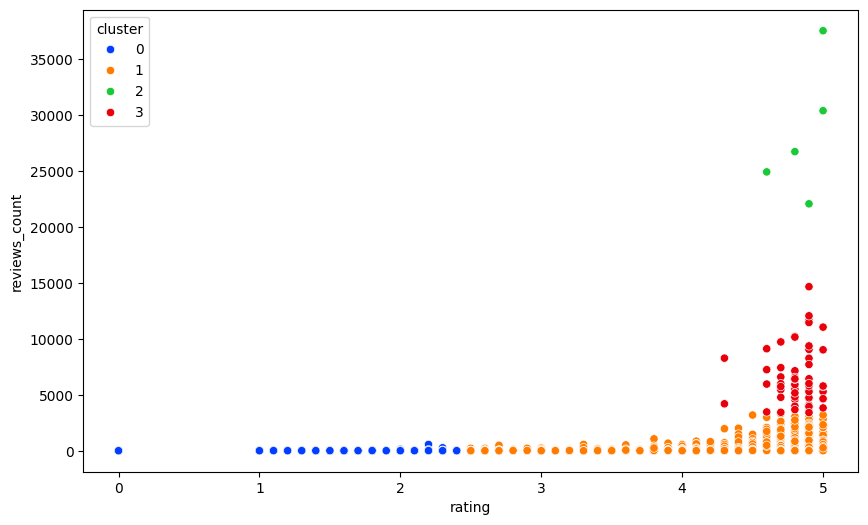

In [105]:
X = df[['rating', 'reviews_count']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = KMeans(n_clusters=4, random_state=42)
df['cluster'] = model.fit_predict(X_scaled)


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rating', y='reviews_count', hue='cluster', palette='bright')
plt.show()


In [106]:
green_cluster_apps = df[df['cluster'] == 2]
green_cluster_apps[['title', 'developer', 'rating', 'reviews_count']]

,title,developer,rating,reviews_count
473,Loox ‑ Product Reviews App,Loox,4.9,22066
2467,Judge.me Product Reviews App,Judge.me,5.0,37534
4773,DSers‑AliExpress Dropshipping,DSers,5.0,30387
5085,TikTok,TikTok Inc.,4.8,26729
10214,"Privy ‑ Pop Ups, Email, & SMS",Privy Operations,4.6,24917


In [110]:
blue_cluster_apps = df[df['cluster'] == 0]
blue_cluster_apps[['title', 'developer', 'rating', 'reviews_count']]

,title,developer,rating,reviews_count
11,Konvera: A/B Testing,Konvera LLC,0.0,0
17,HelloConvo AI,HelloConvo,0.0,0
18,Adelfi,MBG,0.0,0
19,Foxdeli ‑ Tracking & Up‑sell,Foxdeli s.r.o.,0.0,0
20,Zeno Announcement Bar,Zenonian,0.0,0
...,...,...,...,...
11939,GetResponse,GetResponse S.A.,1.0,1
11940,Reescribir Textos,Enzipe Apps,0.0,0
11941,Peregrine Ship,Peregrine Ship,0.0,0
11943,Brand It! Calendar,JadePuma,0.0,0


In [112]:
orange_cluster_apps = df[df['cluster'] == 1]
orange_cluster_apps[['title', 'developer', 'rating', 'reviews_count']]

,title,developer,rating,reviews_count
0,WISO MeinBüro,Buhl Data Service GmbH,5.0,2
1,Iconic: Product Features,CartBoosters,4.7,70
2,Checkbox RRO,Web-Systems Solutions,5.0,1
3,CreditsYard — Store Credit,MerchantYard,4.4,22
4,"BSS Product Options, Variant",Tech Essence (by BSS Commerce),5.0,641
...,...,...,...,...
11945,Octo Sales: AI Chatbot Popup,One Raino Tech,4.9,8
11946,Pickware,Pickware GmbH,4.8,10
11947,Australia Post EZ Label,Bitnext,5.0,260
11948,Endear CRM and Clienteling,Endear,4.5,21
